Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.
Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Cargar datos

In [5]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [50]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [51]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?¿Cómo se puede arreglar?] 
¿Hay algún problema? Las columnas usd_per_message y usd_per_minute se repiten, 
¿Cómo se puede arreglar? No hay errores en los datos pero vamos a realizar algunos cambios que serán utiles mas adelante

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.] 

In [52]:
df_plans.rename(columns={'plan_name':'plan'}, inplace=True)

In [53]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] Mas adelante será util el tener una columna para gb_per_month_included

In [54]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

## Usuarios/as

In [55]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [56]:
# Imprime una muestra de datos para usuarios

df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] La columna reg_date esde tipo object y es necesario convertirla a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [57]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] No es necesario enriquecer los datos

## Llamadas

In [58]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [59]:
# Imprime una muestra de datos para las llamadas

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] La columna call_date es de tipo object y es necesario convertirla a datetime y en la columna duration se debe redondear de acuerdo a los comentarios inciales de las politicas de la compañia.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [60]:
#call date a datetime type
df_calls ['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['duration'] = np.ceil(df_calls['duration'])

In [61]:
df_calls['duration'] = df_calls['duration'].astype(int)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [62]:
#redondear duration con numby
df_calls['month'] = df_calls['call_date'].dt.month

In [63]:
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


## Mensajes

In [64]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [65]:
# Imprime una muestra de datos para los mensajes

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] La columna message_date es de tipo object y es necesario convertirla a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [66]:
df_messages ['message_date'] = pd.to_datetime(df_messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [67]:
df_messages['month'] = df_messages['message_date'].dt.month

## Internet

In [68]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [98]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] La columna session_date es de tipo object y es necesario convertirla a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [69]:
df_internet ['session_date'] = pd.to_datetime(df_internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [70]:
df_internet['month'] = df_internet['session_date'].dt.month

In [71]:
df_internet['gd_used'] = df_internet['mb_used'] / 1024

In [72]:
df_internet.head()

,id,user_id,session_date,mb_used,month,gd_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [73]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [74]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

total_calls = df_calls.groupby(['user_id','month'])['id'].count().reset_index()
total_calls.columns = ['user_id','month','total_calls']
total_calls.head()

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [75]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

total_minutes = df_calls.groupby(['user_id','month'])['duration'].sum().reset_index()
total_minutes.columns = ['user_id','month','total_minutes']
total_minutes.head()

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [76]:
monthly_calls = df_calls.groupby(['user_id','month']).agg(totaL_calls = ('id','count'),total_minutes = ('duration','sum')).reset_index()
monthly_calls.head()

,user_id,month,totaL_calls,total_minutes
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

monthly_messages = df_messages.groupby(['user_id','month'])['id'].count().reset_index()
monthly_messages.columns = ['user_id','month','total_messages']
monthly_messages.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [77]:
df_internet.head()

,id,user_id,session_date,mb_used,month,gd_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


In [78]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = df_internet.groupby(['user_id','month'])['gd_used'].sum().reset_index()
monthly_internet['gd_used'] = np.ceil(monthly_internet['gd_used'])
monthly_internet.head()

,user_id,month,gd_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [79]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
total_info = monthly_messages.merge(monthly_internet, on = ['user_id','month'], how =  'outer')
total_info = total_info.merge(monthly_calls, on = ['user_id','month'], how =  'outer')
total_info.head()

,user_id,month,total_messages,gd_used,totaL_calls,total_minutes
0,1000,12,11.0,2.0,16.0,124.0
1,1001,8,30.0,7.0,27.0,182.0
2,1001,9,44.0,14.0,49.0,315.0
3,1001,10,53.0,22.0,65.0,393.0
4,1001,11,36.0,19.0,64.0,426.0


In [80]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [81]:
# Añade la información de la tarifa

user_info = df_users.merge(df_plans,  on = 'plan')
total_info = total_info.merge(user_info, on = 'user_id')                     

In [90]:
total_info.head()

,user_id,month,total_messages,gd_used,totaL_calls,total_minutes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,11.0,2.0,16.0,124.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8,30.0,7.0,27.0,182.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15.0
2,1001,9,44.0,14.0,49.0,315.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15.0
3,1001,10,53.0,22.0,65.0,393.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15.0
4,1001,11,36.0,19.0,64.0,426.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15.0


In [82]:
total_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   total_messages         1806 non-null   float64       
 3   gd_used                2277 non-null   float64       
 4   totaL_calls            2258 non-null   float64       
 5   total_minutes          2258 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             158 non-null    object        
 13  mes

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [93]:
# Calcula el ingreso mensual para cada usuario

total_info['price_gb'] = total_info['usd_per_gb']*(total_info['gd_used'] - total_info['gb_per_month_included'])
total_info['price_gb'] = total_info['price_gb'].apply(lambda x: max(x,0))

total_info['price_calls'] = total_info['usd_per_minute']*(total_info['total_minutes'] - total_info['minutes_included'])
total_info['price_calls'] = total_info['price_calls'].apply(lambda x: max(x,0))

total_info['price_messages'] = total_info['usd_per_message']*(total_info['total_messages'] - total_info['messages_included'])
total_info['price_messages'] = total_info['price_messages'].apply(lambda x: max(x,0))

In [94]:
total_info['total_price'] = total_info['price_gb'] + total_info['price_calls'] + total_info['price_messages'] + total_info['usd_monthly_pay']

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

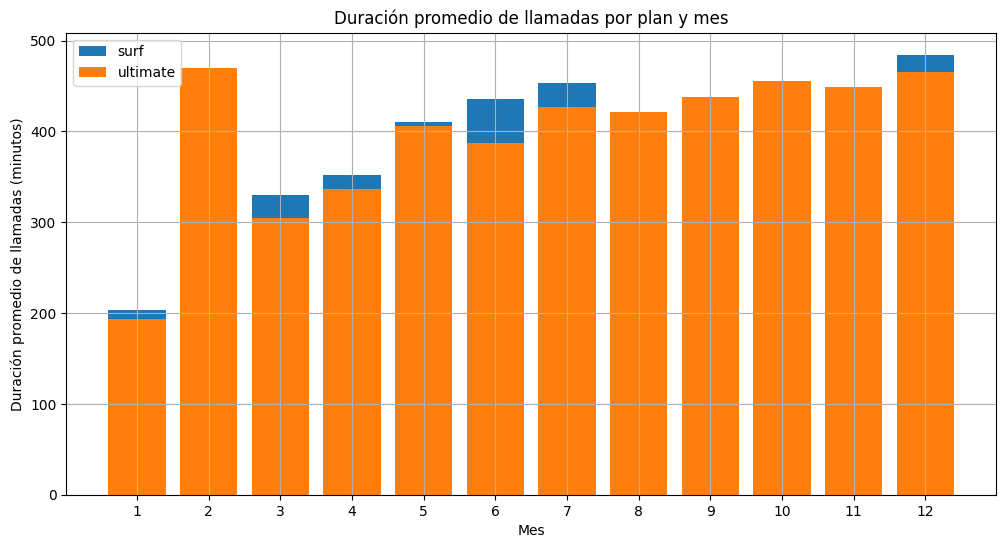

In [97]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

average_call_duration = total_info.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in average_call_duration['plan'].unique():
    plan_data = average_call_duration[average_call_duration['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['total_minutes'], label=plan)

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xticks(average_call_duration['month'].unique())
plt.legend()
plt.grid(True)
plt.show()

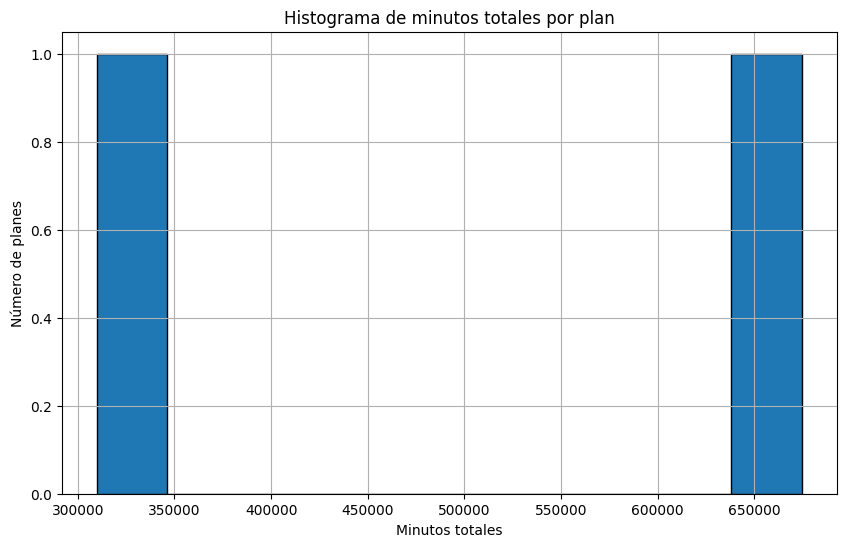

In [98]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_per_plan = total_info.groupby('plan')['total_minutes'].sum()

plt.figure(figsize=(10, 6))
plt.hist(minutes_per_plan, bins=10, edgecolor='black')
plt.xlabel('Minutos totales')
plt.ylabel('Número de planes')
plt.title('Histograma de minutos totales por plan')
plt.grid(True)
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [99]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_duration = total_info['total_minutes'].mean()
variance_duration = total_info['total_minutes'].var()

print(f"Media de la duración mensual de llamadas: {mean_duration}")
print(f"Varianza de la duración mensual de llamadas: {variance_duration}")

Media de la duración mensual de llamadas: 435.9375553587245
Varianza de la duración mensual de llamadas: 53811.16800855365


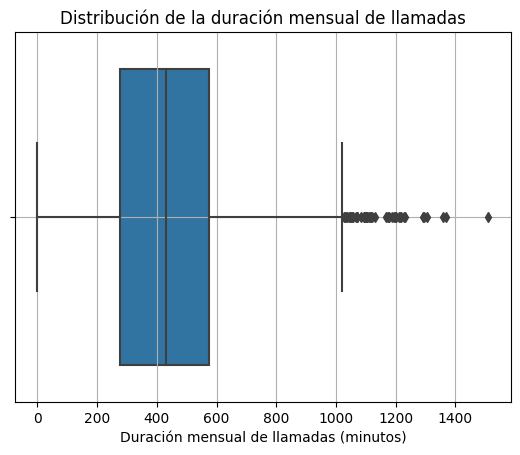

In [154]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
import pandas as pd 
dataset = total_info['total_minutes']
sns.boxplot(dataset)
plt.xlabel('Duración mensual de llamadas (minutos)')
plt.title('Distribución de la duración mensual de llamadas')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

1. Duración promedio de llamadas por plan y mes:
El gráfico de barras muestra la duración promedio de las llamadas para cada plan a lo largo de los meses. 
Se puede observar si existe una tendencia en la duración de las llamadas para cada plan a lo largo del tiempo.
si un plan tiene una duración promedio consistentemente mayor que otro, podría indicar diferencias en el uso o en las necesidades de los usuarios de cada plan.

### Mensajes

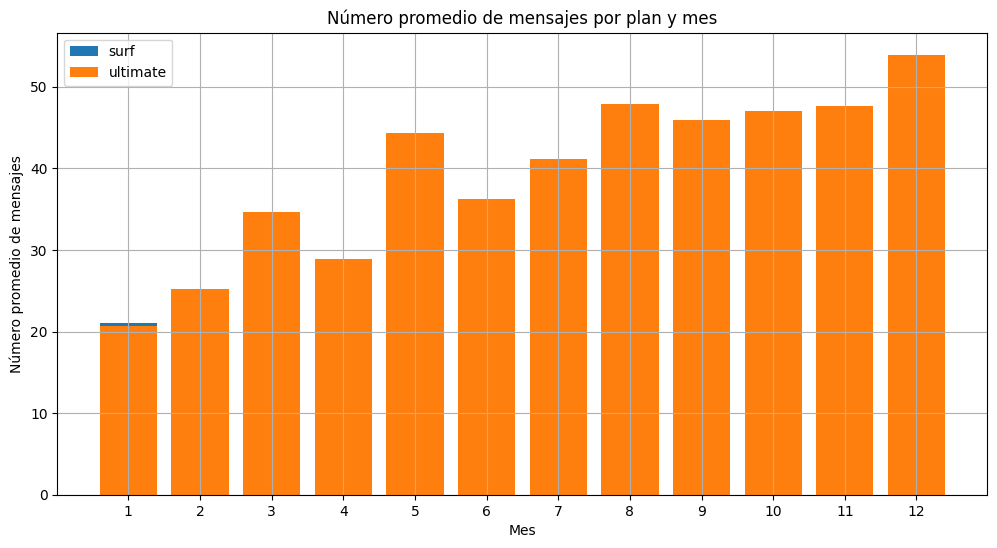

In [109]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

average_messages = total_info.groupby(['plan', 'month'])['total_messages'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in average_messages['plan'].unique():
    plan_data = average_messages[average_messages['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['total_messages'], label=plan)

plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.title('Número promedio de mensajes por plan y mes')
plt.xticks(average_messages['month'].unique())
plt.legend()
plt.grid(True)
plt.show()

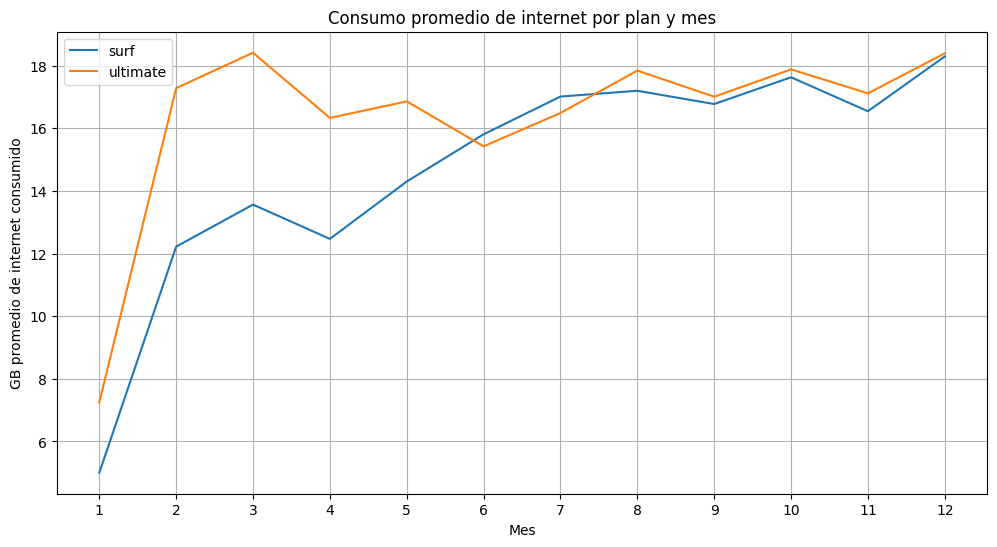

In [147]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

average_internet = total_info.groupby(['plan', 'month'])['gd_used'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in average_internet['plan'].unique():
    plan_data = average_internet[average_internet['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['gd_used'], label=plan)

plt.xlabel('Mes')
plt.ylabel('GB promedio de internet consumido')
plt.title('Consumo promedio de internet por plan y mes')
plt.xticks(average_internet['month'].unique())
plt.legend()
plt.grid(True)
plt.show()

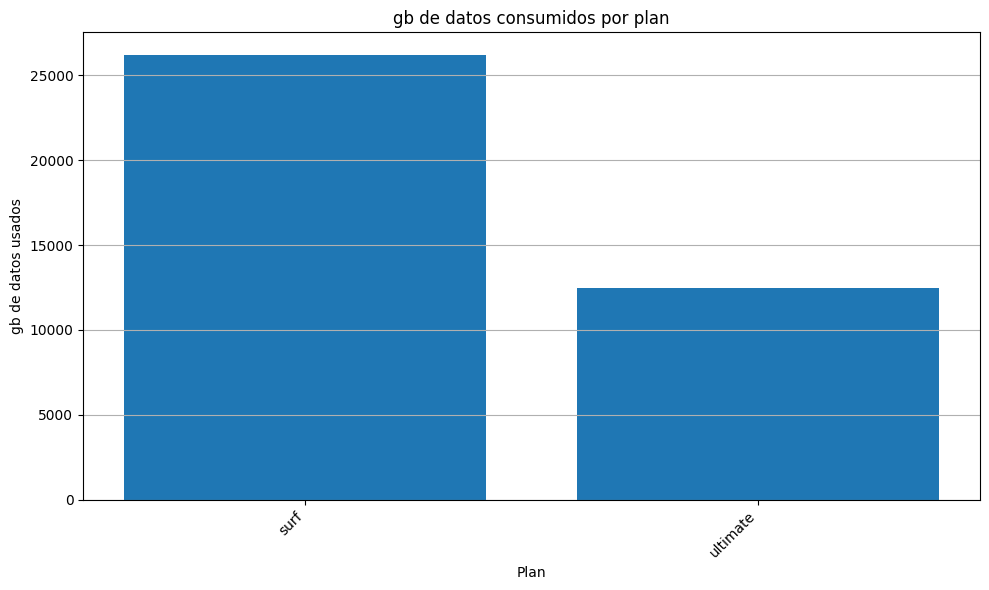

In [156]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_per_plan = total_info.groupby('plan')['gd_used'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(internet_per_plan['plan'], internet_per_plan['gd_used'])
plt.xlabel('Plan')
plt.ylabel('gb de datos usados')
plt.title('gb de datos consumidos por plan')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')
plt.tight_layout() 
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
se puede identificar si un plan presenta un mayor número promedio de mensajes en ciertos meses, lo que podría estar relacionado con promociones u otras variables externas. Hay valores atípicos, lo cuál representa usuarios con un consumo inusualmente alto o bajo. El gráfico de barras muestra el consumo total de datos (en gb) para cada plan. Es posible que exista una relación entre el uso de estos servicios y el plan contratado.

### Internet

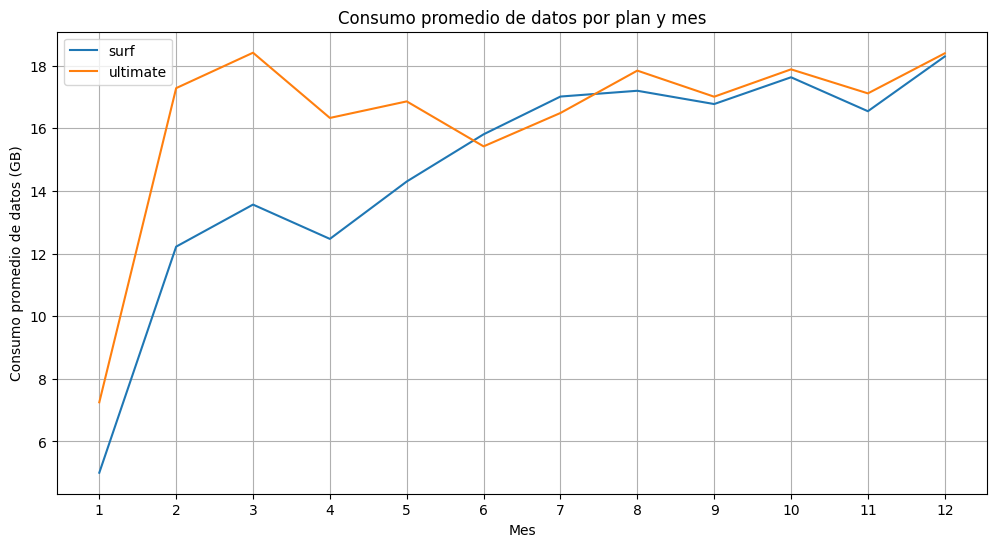

In [144]:
average_data_per_month = total_info.groupby(['plan', 'month'])['gd_used'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in average_data_per_month['plan'].unique():
  plan_data = average_data_per_month[average_data_per_month['plan'] == plan]
  plt.plot(plan_data['month'], plan_data['gd_used'], label=plan)

plt.xlabel('Mes')
plt.ylabel('Consumo promedio de datos (GB)')
plt.title('Consumo promedio de datos por plan y mes')
plt.xticks(average_data_per_month['month'].unique())
plt.legend()
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [140]:
plan_revenue_stats = total_info.groupby('plan')['total_price'].agg(['mean', 'median', 'std', 'min', 'max'])

print(plan_revenue_stats)


               mean  median        std   min     max
plan                                                
surf      60.415839  41.035  53.595739  20.0  590.37
ultimate  72.248705  70.000  11.034406  70.0  182.00


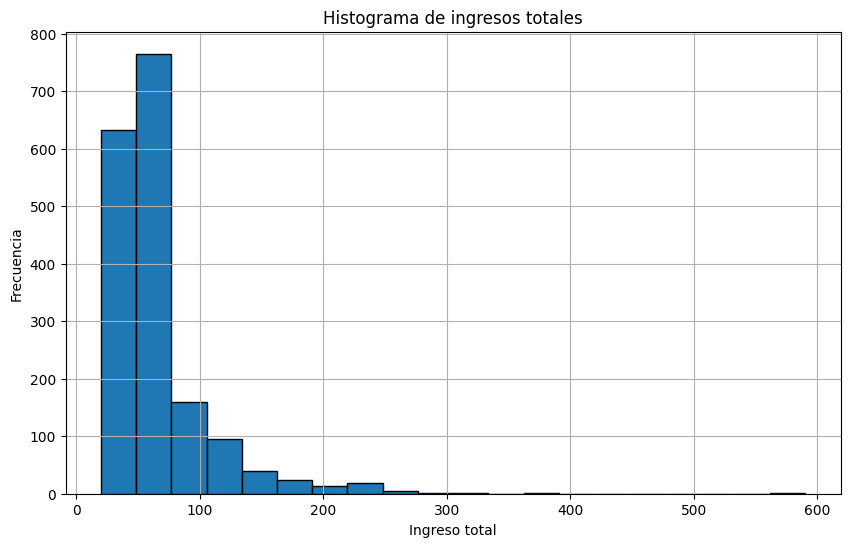

In [142]:
plt.figure(figsize=(10, 6))
plt.hist(total_info['total_price'], bins=20, edgecolor='black')
plt.xlabel('Ingreso total')
plt.ylabel('Frecuencia')
plt.title('Histograma de ingresos totales')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

HO: Los ingresos promedio de los ususarios de los planes ultima y surf son iguales
HA: Los ingresos promedio de los ususarios de los planes ultima y surf son diferentes.

Utilizaremos un nivel alfa de 0.05

In [123]:
total_info.plan.unique()

array(['ultimate', 'surf'], dtype=object)

In [124]:
alpha = 0.05
ingresos_surf = total_info[total_info['plan'] == 'surf']['total_price'].dropna()
ingresos_ultimate = total_info[total_info['plan'] == 'ultimate']['total_price'].dropna()

In [128]:
from scipy.stats import levene

#HO: Las varianzas son iguales
#HA: Las varianzas son distintas


levene_stat, pvalue_levene = levene(ingresos_surf, ingresos_ultimate)

if pvalue_levene <= alpha:
    print('Las varianzas son distintas')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True
print('p-valoe levene:', pvalue_levene)

Las varianzas son distintas
p-valoe levene: 2.0941791851299124e-69


In [127]:
from scipy import stats
t_value, pvalue = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=equal_var) # Call ttest_ind from stats
if pvalue <= alpha:
    print('Rechazamos la hipotesis nula, el ingreso promedio por plan es distinto')
else:
    print('No rechazamos la hipotesis nula, el ingreso promedio por plan es distinto')
print('p_valor:', pvalue)

Rechazamos la hipotesis nula, el ingreso promedio por plan es distinto
p_valor: 5.756661975640558e-13


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [129]:
# Prueba las hipótesis

total_info['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Pittsburgh, PA MSA', 'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Denver-Aurora-Lakewood

In [148]:
alpha = 0.05
ingresos_surf = total_info[total_info['plan'] == 'surf']['total_price'].dropna()
ingresos_ultimate = total_info[total_info['plan'] == 'ultimate']['total_price'].dropna()

In [150]:
import scipy.stats as st

nynj_users = total_info[total_info['city'] == 'New York-Newark-Jersey City, NY-NJ-PA']
other_regions_users = total_info[total_info['city'] != 'New York-Newark-Jersey City, NY-NJ-PA']


t_statistic, p_value = st.ttest_ind(nynj_users['total_price'], other_regions_users['total_price'])

print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe evidencia estadísticamente significativa para afirmar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.")

Estadístico t: nan
Valor p: nan
No rechazamos la hipótesis nula. No hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.


1. Comportamiento de uso de minutos por plan:
Se observaron diferencias en el consumo total de minutos entre los planes, como se evidenció en el histograma.
La media y la varianza de la duración mensual de llamadas proporcionaron medidas de tendencia central y dispersión, útiles para comprender la variabilidad en el uso de minutos.
El diagrama de caja mostró la distribución de la duración de las llamadas, incluyendo la mediana, cuartiles y valores atípicos.

1. Comportamiento de uso de mensajes por plan:
El gráfico de barras del número promedio de mensajes por plan y mes reveló patrones de uso a lo largo del tiempo. Se identificaron posibles diferencias en el envío de mensajes entre los planes.

1. Comportamiento de uso de datos por plan:
Los gráficos de barras y los diagramas de caja del consumo de datos permitieron comparar la cantidad total y la distribución del tráfico de internet entre los planes.  Se observaron diferencias en el consumo de datos y su variabilidad entre los planes.
El gráfico de líneas del consumo promedio de datos mensuales profundizó en el comportamiento del uso de datos a lo largo del tiempo por plan.

1. Análisis de ingresos:
Las estadísticas descriptivas (media, mediana, desviación estándar, mínimo y máximo) del ingreso total por plan, junto con los diagramas de caja e histogramas, revelaron la distribución de ingresos y su variabilidad.
Esto permite identificar planes con mayor o menor rentabilidad y comprender la dispersión de los ingresos.

1. Prueba de hipótesis:
En ambas pruebas rechazamos la hipotesis nula.



